In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import requests

In [2]:
#!pip install yfinance
#!pip install pyfolio
#!pip install seaborn

In [3]:
import yfinance as yf
import pyfolio as pf
import seaborn as sns

In [4]:
#Retrieving data from Yahoo finance api

In [5]:
btc_data = yf.download(tickers='BTC-USD', start='2016-06-15', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [6]:
xrp_data = yf.download(tickers='XRP-USD', start='2016-06-15', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [7]:
eth_data = yf.download(tickers='ETH-USD', start='2016-06-15', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [8]:
doge_data = yf.download(tickers='DOGE-USD', start='2016-06-15', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [9]:
ltc_data = yf.download(tickers='LTC-USD', start='2016-06-15', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [10]:
spy_data = yf.download(tickers='^GSPC', start='2016-06-15', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [11]:
bond_data_5yr = yf.download(tickers='^FVX', start = '2016-06-15', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [12]:
bond_data_10yr = yf.download(tickers='^TNX', start = '2016-06-15', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [13]:
gold_data = yf.download(tickers='GLD', start = '2016-06-15', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [14]:
#cleaning, sorting data
btc = btc_data.drop(columns = ['Open','High','Low','Adj Close','Volume'])
btc.rename(columns={'Close': 'BTC'}, inplace = True)
xrp = xrp_data.drop(columns = ['Open','High','Low','Adj Close','Volume'])
xrp.rename(columns={'Close': 'XRP'}, inplace = True)
eth = eth_data.drop(columns = ['Open','High','Low','Adj Close','Volume'])
eth.rename(columns={'Close': 'ETH'}, inplace = True)
ltc = ltc_data.drop(columns = ['Open','High','Low','Adj Close','Volume'])
ltc.rename(columns={'Close': 'LTC'}, inplace = True)
doge = doge_data.drop(columns = ['Open','High','Low','Adj Close','Volume'])
doge.rename(columns={'Close': 'DOGE'}, inplace = True)
spy = spy_data.drop(columns = ['Open','High','Low','Adj Close','Volume'])
spy.rename(columns={'Close': '^GSPC'}, inplace = True)
bond_5yr = bond_data_5yr.drop(columns = ['Open','High','Low','Adj Close','Volume'])
bond_5yr.rename(columns={'Close': '5yr Bond'}, inplace = True)
bond_10yr = bond_data_10yr.drop(columns = ['Open','High','Low','Adj Close','Volume'])
bond_10yr.rename(columns={'Close': '10yr Bond'}, inplace = True)
gold = gold_data.drop(columns = ['Open','High','Low','Adj Close','Volume'])
gold.rename(columns={'Close': 'Gold Trust'}, inplace = True)

In [15]:
#Join dataframes
df = pd.concat([btc, xrp, eth, ltc, doge, spy, bond_5yr, bond_10yr, gold], axis='columns', join="outer")
df.dropna(inplace = True)
df

BTC       XRP          ETH         LTC      DOGE  \
Date                                                                    
2016-06-15    694.468994  0.006887    18.354300    5.239780  0.000313   
2016-06-16    766.307983  0.006676    20.588600    5.660790  0.000335   
2016-06-17    748.908997  0.006693    15.376800    5.593270  0.000321   
2016-06-20    737.226013  0.006626    11.839500    5.294540  0.000323   
2016-06-21    666.651978  0.006172    13.306700    4.821750  0.000307   
...                  ...       ...          ...         ...       ...   
2021-06-14  40218.476562  0.892897  2537.891113  172.949097  0.332085   
2021-06-15  40406.269531  0.889800  2610.936768  178.659424  0.328381   
2021-06-16  38347.062500  0.831908  2367.663574  166.458939  0.307761   
2021-06-17  38053.503906  0.841438  2372.001953  167.055695  0.306496   
2021-06-18  35787.246094  0.797648  2231.733154  156.355637  0.293472   

                  ^GSPC  5yr Bond  10yr Bond  Gold Trust  
Date                                                      
2016-06-15  2071.500000     1.099      1.596  123.680000  
2016-06-16  2077.989990     1.078      1.564  122.379997  
2016-06-17  2071.219971     1.121      1.618  123.949997  
2016-06-20  2083.250000     1.163      1.670  123.209999  
2016-06-21  2088.899902     1.194      1.697  120.839996  
...                 ...       ...        ...         ...  
2021-06-14  4255.149902     0.787      1.501  174.710007  
2021-06-15  4246.589844     0.785      1.499  174.050003  
2021-06-16  4223.700195     0.882      1.569  171.110001  
2021-06-17  4221.859863     0.879      1.511  165.850006  
2021-06-18  4166.450195     0.886      1.450  164.929993  

[1246 rows x 9 columns]

In [16]:
#Save dataframe as csv
df.to_csv(fr'C:\Users\Kris\Desktop\Project_I\df.csv')

In [17]:
df_daily_returns = df.pct_change()
df_daily_returns

BTC       XRP       ETH       LTC      DOGE     ^GSPC  \
Date                                                                     
2016-06-15       NaN       NaN       NaN       NaN       NaN       NaN   
2016-06-16  0.103444 -0.030637  0.121732  0.080349  0.070288  0.003133   
2016-06-17 -0.022705  0.002546 -0.253140 -0.011928 -0.041791 -0.003258   
2016-06-20 -0.015600 -0.010010 -0.230041 -0.053409  0.006230  0.005808   
2016-06-21 -0.095729 -0.068518  0.123924 -0.089298 -0.049536  0.002712   
...              ...       ...       ...       ...       ...       ...   
2021-06-14  0.077250  0.052386  0.078224  0.061816  0.039849  0.001815   
2021-06-15  0.004669 -0.003468  0.028782  0.033017 -0.011154 -0.002012   
2021-06-16 -0.050963 -0.065062 -0.093175 -0.068289 -0.062793 -0.005390   
2021-06-17 -0.007655  0.011456  0.001832  0.003585 -0.004110 -0.000436   
2021-06-18 -0.059555 -0.052042 -0.059135 -0.064051 -0.042493 -0.013124   

            5yr Bond  10yr Bond  Gold Trust  
Date                                         
2016-06-15       NaN        NaN         NaN  
2016-06-16 -0.019108  -0.020050   -0.010511  
2016-06-17  0.039889   0.034527    0.012829  
2016-06-20  0.037466   0.032138   -0.005970  
2016-06-21  0.026655   0.016168   -0.019235  
...              ...        ...         ...  
2021-06-14  0.052139   0.026676   -0.005861  
2021-06-15 -0.002541  -0.001333   -0.003778  
2021-06-16  0.123567   0.046698   -0.016892  
2021-06-17 -0.003401  -0.036966   -0.030740  
2021-06-18  0.007964  -0.040371   -0.005547  

[1246 rows x 9 columns]

In [18]:
# Plot daily returns of all crypto
df_daily_returns.hvplot(title="Daily Returns", figsize = (30, 20))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [19]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + df_daily_returns).cumprod()
cumulative_returns

BTC         XRP         ETH        LTC         DOGE  \
Date                                                                    
2016-06-15        NaN         NaN         NaN        NaN          NaN   
2016-06-16   1.103444    0.969363    1.121732   1.080349     1.070288   
2016-06-17   1.078391    0.971831    0.837776   1.067463     1.025559   
2016-06-20   1.061568    0.962103    0.645053   1.010451     1.031949   
2016-06-21   0.959945    0.896181    0.724991   0.920220     0.980831   
...               ...         ...         ...        ...          ...   
2021-06-14  57.912559  129.649630  138.272295  33.006939  1060.974494   
2021-06-15  58.182971  129.199943  142.252052  34.096742  1049.140592   
2021-06-16  55.217818  120.793957  128.997763  31.768307   983.262034   
2021-06-17  54.795109  122.177725  129.234131  31.882197   979.220439   
2021-06-18  51.531813  115.819371  121.591845  29.840115   937.610208   

               ^GSPC  5yr Bond  10yr Bond  Gold Trust  
Date                                                   
2016-06-15       NaN       NaN        NaN         NaN  
2016-06-16  1.003133  0.980892   0.979950    0.989489  
2016-06-17  0.999865  1.020018   1.013785    1.002183  
2016-06-20  1.005672  1.058235   1.046366    0.996200  
2016-06-21  1.008400  1.086442   1.063283    0.977037  
...              ...       ...        ...         ...  
2021-06-14  2.054139  0.716106   0.940476    1.412597  
2021-06-15  2.050007  0.714286   0.939223    1.407261  
2021-06-16  2.038957  0.802548   0.983083    1.383490  
2021-06-17  2.038069  0.799818   0.946742    1.340961  
2021-06-18  2.011320  0.806187   0.908521    1.333522  

[1246 rows x 9 columns]

In [20]:
#Plot cumulative returns
cumulative_returns.hvplot(title = 'Cumulative Returns', figsize = (20, 10))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [21]:
# Box plot to visually show risk
cumulative_returns.hvplot.box(title = "Crypto Risk" , figsize = (20, 10))

:BoxWhisker   [Variable]   (value)

In [22]:
# Calculate the daily standard deviations of all portfolios
daily_std = df_daily_returns.std().sort_values(ascending=False)
daily_std

DOGE          0.129811
XRP           0.094047
LTC           0.073790
ETH           0.071039
BTC           0.048429
5yr Bond      0.046471
10yr Bond     0.037693
^GSPC         0.011994
Gold Trust    0.008655
dtype: float64

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

DOGE          2.060690
XRP           1.492943
LTC           1.171387
ETH           1.127712
BTC           0.768782
5yr Bond      0.737700
10yr Bond     0.598355
^GSPC         0.190392
Gold Trust    0.137393
dtype: float64

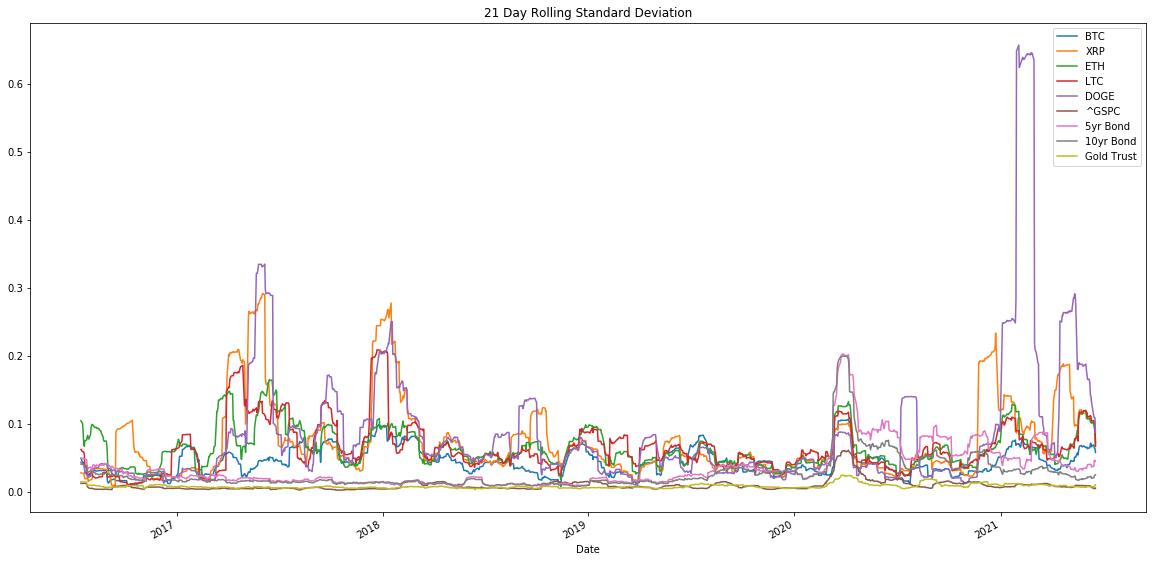

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
df_daily_returns.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize = (20, 10))

In [25]:
# Calculate the correlation
# Display de correlation matrix
correlation = df_daily_returns.corr()
correlation

BTC       XRP       ETH       LTC      DOGE     ^GSPC  \
BTC         1.000000  0.367391  0.601461  0.616334  0.376804  0.178594   
XRP         0.367391  1.000000  0.352519  0.407843  0.292543  0.133387   
ETH         0.601461  0.352519  1.000000  0.570356  0.358781  0.195336   
LTC         0.616334  0.407843  0.570356  1.000000  0.332750  0.160927   
DOGE        0.376804  0.292543  0.358781  0.332750  1.000000  0.056483   
^GSPC       0.178594  0.133387  0.195336  0.160927  0.056483  1.000000   
5yr Bond    0.013174  0.012750  0.020237  0.024638 -0.003297  0.344255   
10yr Bond   0.031287  0.025566  0.035546  0.035122  0.012864  0.377576   
Gold Trust  0.109962  0.028316  0.098773  0.068164  0.065541  0.048136   

            5yr Bond  10yr Bond  Gold Trust  
BTC         0.013174   0.031287    0.109962  
XRP         0.012750   0.025566    0.028316  
ETH         0.020237   0.035546    0.098773  
LTC         0.024638   0.035122    0.068164  
DOGE       -0.003297   0.012864    0.065541  
^GSPC       0.344255   0.377576    0.048136  
5yr Bond    1.000000   0.921671   -0.313140  
10yr Bond   0.921671   1.000000   -0.303807  
Gold Trust -0.313140  -0.303807    1.000000

In [26]:
#!pip install seaborn
import seaborn as sns

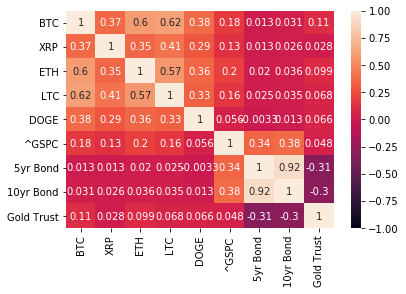

In [27]:
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

In [28]:
# Slice dataframe for 1 year returns
df_1yr = df.loc['2020-06-16':'2021-06-16']
df_1yr

BTC       XRP          ETH         LTC      DOGE  \
Date                                                                    
2020-06-16   9538.024414  0.191307   234.416168   43.877258  0.002487   
2020-06-17   9480.254883  0.193443   233.028275   44.032356  0.002485   
2020-06-18   9411.840820  0.190957   232.101166   43.560131  0.002472   
2020-06-19   9288.018555  0.186790   227.138290   42.679832  0.002435   
2020-06-22   9648.717773  0.189272   242.533188   44.188004  0.002474   
...                  ...       ...          ...         ...       ...   
2021-06-10  36702.597656  0.869182  2471.518555  168.203064  0.326351   
2021-06-11  37334.398438  0.848450  2353.768799  162.880524  0.319359   
2021-06-14  40218.476562  0.892897  2537.891113  172.949097  0.332085   
2021-06-15  40406.269531  0.889800  2610.936768  178.659424  0.328381   
2021-06-16  38347.062500  0.831908  2367.663574  166.458939  0.307761   

                  ^GSPC  5yr Bond  10yr Bond  Gold Trust  
Date                                                      
2020-06-16  3124.739990     0.350      0.756  162.250000  
2020-06-17  3113.489990     0.339      0.733  162.559998  
2020-06-18  3115.340088     0.328      0.694  162.240005  
2020-06-19  3097.739990     0.327      0.697  164.029999  
2020-06-22  3117.860107     0.335      0.704  165.089996  
...                 ...       ...        ...         ...  
2021-06-10  4239.180176     0.731      1.459  177.740005  
2021-06-11  4247.439941     0.748      1.462  175.740005  
2021-06-14  4255.149902     0.787      1.501  174.710007  
2021-06-15  4246.589844     0.785      1.499  174.050003  
2021-06-16  4223.700195     0.882      1.569  171.110001  

[248 rows x 9 columns]

In [29]:
#Calculate pct_change of 1 year data
df_1yr_daily_returns = df_1yr.pct_change()
df_1yr_daily_returns

BTC       XRP       ETH       LTC      DOGE     ^GSPC  \
Date                                                                     
2020-06-16       NaN       NaN       NaN       NaN       NaN       NaN   
2020-06-17 -0.006057  0.011165 -0.005921  0.003535 -0.000804 -0.003600   
2020-06-18 -0.007216 -0.012851 -0.003979 -0.010725 -0.005231  0.000594   
2020-06-19 -0.013156 -0.021822 -0.021382 -0.020209 -0.014968 -0.005649   
2020-06-22  0.038835  0.013288  0.067778  0.035337  0.016016  0.006495   
...              ...       ...       ...       ...       ...       ...   
2021-06-10 -0.017205 -0.055272 -0.052429 -0.022863 -0.049457  0.004652   
2021-06-11  0.017214 -0.023852 -0.047643 -0.031644 -0.021425  0.001948   
2021-06-14  0.077250  0.052386  0.078224  0.061816  0.039849  0.001815   
2021-06-15  0.004669 -0.003468  0.028782  0.033017 -0.011154 -0.002012   
2021-06-16 -0.050963 -0.065062 -0.093175 -0.068289 -0.062793 -0.005390   

            5yr Bond  10yr Bond  Gold Trust  
Date                                         
2020-06-16       NaN        NaN         NaN  
2020-06-17 -0.031429  -0.030423    0.001911  
2020-06-18 -0.032448  -0.053206   -0.001968  
2020-06-19 -0.003049   0.004323    0.011033  
2020-06-22  0.024465   0.010043    0.006462  
...              ...        ...         ...  
2021-06-10 -0.018792  -0.020148    0.004294  
2021-06-11  0.023256   0.002056   -0.011252  
2021-06-14  0.052139   0.026676   -0.005861  
2021-06-15 -0.002541  -0.001333   -0.003778  
2021-06-16  0.123567   0.046698   -0.016892  

[248 rows x 9 columns]

In [30]:
# Plot daily returns of all crypto
df_1yr_daily_returns.hvplot(title="Daily Returns", figsize = (30, 20))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [31]:
# Calculate cumulative returns of all portfolios
cumulative_returns_1yr = (1 + df_1yr_daily_returns).cumprod()
cumulative_returns_1yr

BTC       XRP        ETH       LTC        DOGE     ^GSPC  \
Date                                                                        
2020-06-16       NaN       NaN        NaN       NaN         NaN       NaN   
2020-06-17  0.993943  1.011165   0.994079  1.003535    0.999196  0.996400   
2020-06-18  0.986770  0.998170   0.990124  0.992772    0.993969  0.996992   
2020-06-19  0.973789  0.976389   0.968953  0.972710    0.979091  0.991359   
2020-06-22  1.011605  0.989363   1.034627  1.007082    0.994773  0.997798   
...              ...       ...        ...       ...         ...       ...   
2021-06-10  3.848029  4.543388  10.543294  3.833491  131.222749  1.356651   
2021-06-11  3.914270  4.435018  10.040983  3.712186  128.411337  1.359294   
2021-06-14  4.216646  4.667352  10.826434  3.941657  133.528349  1.361761   
2021-06-15  4.236335  4.651163  11.138040  4.071800  132.038999  1.359022   
2021-06-16  4.020441  4.348550  10.100257  3.793741  123.747891  1.351697   

            5yr Bond  10yr Bond  Gold Trust  
Date                                         
2020-06-16       NaN        NaN         NaN  
2020-06-17  0.968571   0.969577    1.001911  
2020-06-18  0.937143   0.917989    0.999938  
2020-06-19  0.934286   0.921958    1.010971  
2020-06-22  0.957143   0.931217    1.017504  
...              ...        ...         ...  
2021-06-10  2.088571   1.929894    1.095470  
2021-06-11  2.137143   1.933862    1.083143  
2021-06-14  2.248571   1.985450    1.076795  
2021-06-15  2.242857   1.982804    1.072727  
2021-06-16  2.520000   2.075397    1.054607  

[248 rows x 9 columns]

In [32]:
#Plot 1 year cumulative returns
cumulative_returns_1yr.hvplot(title = 'Cumulative Returns', figsize = (20, 10))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [33]:
# Box plot to visually show risk
cumulative_returns_1yr.hvplot.box(title = "Crypto Risk" , figsize = (20, 10))

:BoxWhisker   [Variable]   (value)

In [34]:
# Calculate the daily standard deviations of all portfolios
daily_std_1yr = df_1yr_daily_returns.std().sort_values(ascending=False)
daily_std_1yr

DOGE          0.231442
XRP           0.106268
ETH           0.068982
LTC           0.068375
5yr Bond      0.060885
BTC           0.046240
10yr Bond     0.037439
Gold Trust    0.010335
^GSPC         0.009908
dtype: float64

In [37]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
df_1yr_daily_returns.rolling(window=21).std().hvplot(title="21 Day Rolling Standard Deviation", figsize = (20, 10))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [38]:
# Calculate the correlation
# Display de correlation matrix
correlation_1yr = df_1yr_daily_returns.corr()
correlation_1yr

BTC       XRP       ETH       LTC      DOGE     ^GSPC  \
BTC         1.000000  0.339903  0.686793  0.788892  0.311588  0.249675   
XRP         0.339903  1.000000  0.449241  0.456046  0.177188  0.196363   
ETH         0.686793  0.449241  1.000000  0.779131  0.305063  0.187238   
LTC         0.788892  0.456046  0.779131  1.000000  0.292625  0.195800   
DOGE        0.311588  0.177188  0.305063  0.292625  1.000000 -0.033917   
^GSPC       0.249675  0.196363  0.187238  0.195800 -0.033917  1.000000   
5yr Bond   -0.025839 -0.025497 -0.068778 -0.047980 -0.027847  0.002093   
10yr Bond  -0.004263  0.006565 -0.033925 -0.040609  0.002497  0.071306   
Gold Trust  0.140342  0.014698  0.169321  0.192273  0.085562  0.252184   

            5yr Bond  10yr Bond  Gold Trust  
BTC        -0.025839  -0.004263    0.140342  
XRP        -0.025497   0.006565    0.014698  
ETH        -0.068778  -0.033925    0.169321  
LTC        -0.047980  -0.040609    0.192273  
DOGE       -0.027847   0.002497    0.085562  
^GSPC       0.002093   0.071306    0.252184  
5yr Bond    1.000000   0.919593   -0.337643  
10yr Bond   0.919593   1.000000   -0.294647  
Gold Trust -0.337643  -0.294647    1.000000

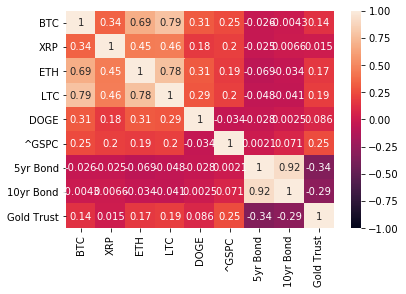

In [39]:
sns.heatmap(correlation_1yr,  vmin=-1, vmax=1,annot=True)

In [40]:
#def get_max_drawdown_underwater(underwater):
   # vallay = underwater.index[np.argmin(underwater)]

In [41]:
pf.create_returns_tear_sheet(df_1yr_daily_returns['BTC'])

AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'